# **CS 4361/5361 Machine Learning**

**Final Exam**

# **Part 1**

## **A classification problem.**


Write a code cell to classify the Olivetti Faces data set using the Sklearn implementation of one of the algorithms you learned in this course.

Try to find the best combination of algorithm and parameters. Your grade will depend on the quality of your results and the analysis presented.

Download data and split into training and test set.

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_olivetti_faces(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(320, 4096) (80, 4096) (320,) (80,)


Show some of the image in the dataset.

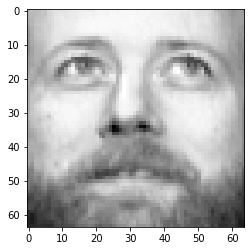

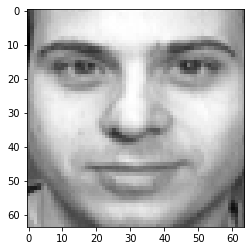

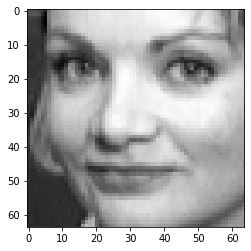

In [ ]:
rs = np.random.randint(0,X_train.shape[0],size=3)
for r in rs:
  plt.figure()
  plt.imshow(X_train[r].reshape(64,64),cmap='gray')

**Enter you code here.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

n_components = 32
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

svm = SVC()
svm.fit(x_train_pca, y_train)
pred = svm.predict(x_test_pca)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))

Model accuracy: 0.9500


Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:** I decided to go with this approach of using support vector machines with principal component analysis because our data set is not very large making support vector machines a more viable option and principal component analysis is very helpful when classifying faces making this an easier decision and working better then other options.

## **A regression problem.**

Write a code cell to predict the target value (house prices; a real value) in the California Housing dataset using the Sklearn implementation of one of the algorithms you learned in this course.

You may want to consider scaling the data and/or PCA preprocessing. 

Try to find the best combination of algorithm and parameters. Your grade will depend on the quality of your results and the analysis presented.

In [ ]:
from sklearn.datasets import fetch_california_housing

X, y = datasets.fetch_california_housing(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


**Enter you code here.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('Mean absolute error: {:.4f}'.format(mean_absolute_error(y_test,pred)))
print('Mean squared error: {:.4f}'.format(mean_squared_error(y_test,pred)))

Mean absolute error: 0.3325
Mean squared error: 0.2603


Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:** I decided to do a random forest regressor and use a min max scalar to scale the data. The reason for which is that random forest seem to do well when we dont have many parameters and can be helped by a min mix scalar to scale all data equally.

# **Part 2**

## **A classification problem.**


Write a code cell to classify the Olivetti Faces data set using a deep neural network, implemented using the Keras library.

Try to find the best combination of architecture and learning parameters. Your grade will depend on the quality of your results and the analysis presented.

Download data and split into training and test set.

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_olivetti_faces(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 4096) (80, 4096) (320,) (80,)


**Enter you code here.**

In [3]:
num_classes = np.max(y_train) + 1
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

NameError: ignored

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 1000)              4097000   
                                                                 
 dense_191 (Dense)           (None, 500)               500500    
                                                                 
 dense_192 (Dense)           (None, 40)                20040     
                                                                 
Total params: 4,617,540
Trainable params: 4,617,540
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 5.4100 - accuracy: 0.0219 - val_loss: 5.2098 - val_accuracy: 0.0125
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 4.4899 - accuracy: 0.0375 - val_loss: 3.8475 - val_accuracy: 0.0375
Epoch 3/50
10/10 [========

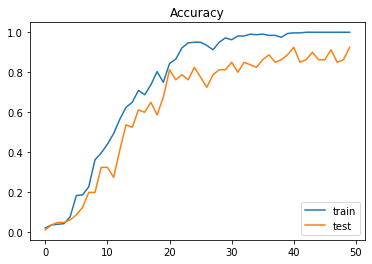

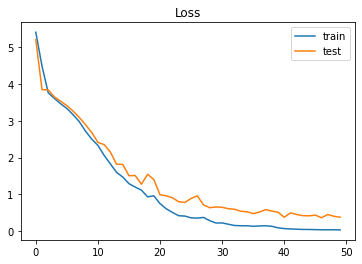

In [ ]:
def dense_model(inputs = 4096,hidden_1=1000, hidden_2=500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(40, activation='softmax'))
  return model

dense = dense_model()
dense.summary() 
dense.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=["accuracy"])

history = dense.fit(
    X_train, y_train,
    epochs =  50, 
    batch_size=32, 
    verbose = 1,
    validation_data=(X_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
plot_results(history)

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:** The Approach that I decided to use was a basic Deep learning network with some basic changes, first we have to convert y to onehot to get the network running then I decided to change the batch size and raise the epochs in accordace with our data because we have for less images we have to reduce our batch size. After reducing the batch size I saw that the learning rate was just too high, therefore I decided to use the learning optmizer adam and that significantly improved results. after this I had to increase the number of paramters on the dense layers because the input size is greater then usual. some other things I tried but didnt have effect were dropout and adding more layers didnt seem to make any improvements.

## **A regression problem.**

Write a code cell to predict the target value (house prices; a real value) in the California Housing dataset using using a deep neural network, implemented using the Keras library.

You may want to consider scaling the data and/or PCA preprocessing. 

Try to find the best combination of architecture and learning parameters. Your grade will depend on the quality of your results and the analysis presented.

In [5]:
from sklearn.datasets import fetch_california_housing

X, y = datasets.fetch_california_housing(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


**Enter you code here.**

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
def dense_model(inputs = 8,hidden_1=500, hidden_2=300):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  return model

dense = dense_model()
dense.summary() 
dense.compile(optimizer=tf.keras.optimizers.Adam(learning_rate =0.005), loss="mse", metrics=["mse"])

history = dense.fit(
    x_train, y_train,
    epochs =  100, 
    batch_size= 256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               4500      
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 190,001
Trainable params: 190,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
65/65 [=============================

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:** I decided to go with a basic approach using deep learning neural network, basically fitting our network to do regression meaning optmizing mean squared error, I changed the number of paramters and added extra layers to make a kind of decent in number of paramters. I also changed the learning rate as it was taking too many epochs to get the desired result meaning the learning rate was to low. I used Adam as an optimier which helped results.I also added the min max scaler to scale our data and it made a big improvement. I tried Batch normalization and dropout neither of which helped a ton, although batch normalization seemed to help a tiny bit it made results very unpredictable.

# **Part 3**

## **Natural Language Processing**

### **Bag of Words**

Load libraries

In [ ]:
import bs4 as bs
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Read data

In [ ]:
def get_paragraph_list(url,skip):
    paragraphs = []
    data = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(data,'lxml')
    for paragraph in soup.find_all('p'):
        par  = paragraph.get_text()
        if par:
            if len(par)>=25:
              paragraphs.append(par)           
    return paragraphs[skip:]

url_list = ['http://www.gutenberg.org/files/215/215-h/215-h.htm', 'http://www.gutenberg.org/files/345/345-h/345-h.htm', 'http://www.gutenberg.org/files/1661/1661-h/1661-h.htm']

paragraphs = []
targets = []
first_par = []
skip = [1,4,0]
for u, url in enumerate(url_list):
    par = get_paragraph_list(url,skip[u])
    paragraphs = paragraphs + par
    targets = targets + [u for i in par]
    print('\nBook {} contains {} paragraphs'.format(u,len(par)))
    lengths = np.array([len(wl) for wl in par])
    print('Paragraph length stats:')
    print('min = {} max = {} mean = {:4f}'.format(np.min(lengths),np.max(lengths),np.mean(lengths)))
    #print('First paragraph:')
    #print(par[0])    



Book 0 contains 329 paragraphs
Paragraph length stats:
min = 25 max = 1580 mean = 539.917933

Book 1 contains 1790 paragraphs
Paragraph length stats:
min = 25 max = 4780 mean = 468.315084

Book 2 contains 2269 paragraphs
Paragraph length stats:
min = 25 max = 2578 mean = 250.155575


Split into training and test set

In [ ]:
np.random.seed(5361)
n = len(paragraphs)
ind = np.random.permutation(n)
x_test = [paragraphs[i] for i in ind[:n//5]]
x_train = [paragraphs[i] for i in ind[n//5:]]
y_test = np.array([targets[i] for i in ind[:n//5]])
y_train = np.array([targets[i] for i in ind[n//5:]])

In [ ]:
count_vect = CountVectorizer(strip_accents= 'unicode',token_pattern=r'\b[^\d\W]+\b')
count_vect.fit(x_train)

x_train_counts = np.array(count_vect.transform(x_train).todense())
x_test_counts = np.array(count_vect.transform(x_test).todense())

print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

print('Size of vocabulary:', len(count_vect.vocabulary_)) # This has to be the same as x_train_counts.shape[1] and x_test_counts.shape[1]


Training set has 3511 examples, 12543 features
Test set has 877 examples, 12543 features
Size of vocabulary: 12543


Recall that *count_vect.vocabulary_[w]* represents the column that contains the number of times word w appears in a document. 

Let's see which columns represent the counts for the book's protagonists' names. 


In [ ]:
for p in ['buck','dracula','holmes']:
  col = count_vect.vocabulary_[p]
  print('The number of times',p,'appears in document is stored in column',col)
  

The number of times buck appears in document is stored in column 1404
The number of times dracula appears in document is stored in column 3271
The number of times holmes appears in document is stored in column 5283


Now let's classify the data:

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.9019
Confusion matrix:
 [[ 68   7   5]
 [  1 332  16]
 [  1  56 391]]


**Question 1.** Write a code cell that will print all the paragraphs in the test set that belong to class 0 ('The Call of the Wild') but were classified as belonging to class 2 ('The Adventures of Sherlock Holmes'). Hint: the paragraph represented by x_test_counts[i] is x_test[i], and belongs to class y_test[i]. 

In [ ]:
c0 = [y_test == 0]
c2 = [pred == 2]

pgs = np.logical_and(c2,c0)
pgs = pgs.reshape(-1) * 1

for i in range(len(pgs)):
  if pgs[i] == 1:
    print(x_test[i])


“Gad, sir! Gad, sir!” stuttered a member of the latest dynasty, a
king of the Skookum Benches. “I offer you eight hundred for him, sir,
before the test, sir; eight hundred just as he stands.”


“Why shouldn’t it?” Charles demanded rather shortly.


François was angry. “Now, by Gar, I feex you!” he cried, coming
back with a heavy club in his hand.


Thornton rose to his feet. His eyes were wet. The tears were streaming frankly
down his cheeks. “Sir,” he said to the Skookum Bench king,
“no, sir. You can go to hell, sir. It’s the best I can do for you,
sir.”


Charles turned his back and drew the lashings down as well as he could, which
was not in the least well.



**Question 2.** The parameter alpha controls the amount of smoothing applied to the data by the Naive Bayes Classifier. Find a value of alpha that yields better results than the default value of 1.0. 

In [ ]:
clf = MultinomialNB(alpha= .01)
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.9111
Confusion matrix:
 [[ 71   5   4]
 [  1 332  16]
 [  2  50 396]]


**Question 3.** Write a code cell that will train the MultinomialNB() classifier using all the available data (stored in *paragraphs*) and test it using the same data. You should get a higher accuracy than in the orginal experiment. Hint: Before splitting into training and test sets, the text data is in variable *paragraphs* and the labels in variable *targets*.


In [ ]:
p = paragraphs
t = targets

count_vect = CountVectorizer(strip_accents= 'unicode',token_pattern=r'\b[^\d\W]+\b')
count_vect.fit(p)

p_counts = np.array(count_vect.transform(p).todense())

clf = MultinomialNB(alpha= 0.1)
clf.fit(p_counts, t)
pred = clf.predict(p_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(t,pred)))
print('Confusion matrix:\n',confusion_matrix(t,pred))

Model accuracy: 0.9544
Confusion matrix:
 [[ 318    8    3]
 [   3 1735   52]
 [   3  131 2135]]


### **Word embeddings**


Upload *glove50_10000.txt* containing word embeddings of 10000 words and 50 dimensions.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove50_10000.txt to glove50_10000.txt


In [ ]:
def read_embeddings():
    # Reads n embeddings from file
    # Returns a dictionary were embedding[w] is the embeding of string w
    embedding = {}
    count = 0
    with open('glove50_10000.txt', encoding="utf8") as f: 
        for line in f: 
            ls = line.split(" ")
            emb = np.array([np.float32(x) for x in ls[1:]])
            embedding[ls[0]]=emb
    return embedding

embedding = read_embeddings()

In [ ]:
def distance(w1,w2,emb):
  # Return Euclidean distance from emb[w1] to emb[w2]
  e1,e2 = emb[w1], emb[w2]
  return np.linalg.norm(e1-e2)

In [ ]:
print(len(embedding))

10000


In [ ]:
vocabulary = list(embedding.keys())
print('Most common words:')
print(vocabulary[:10])
print('Least common words:')
print(vocabulary[-10:])

Most common words:
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
Least common words:
['slashed', '23-year', 'communique', 'hawk', 'necessity', 'petty', 'stretching', 'taxpayer', 'resistant', 'quinn']


**Question 4.** Write a function that receives a word *w* and an embedding dictionary and returns the most similar word to *w* in the vocabulary. We define the most simlar word to w as the one with the smallest Eculidean distance to *w*.

In [ ]:
def most_similar(w,embedding):
  vocabulary = list(embedding.keys())
  dist = 100000000000
  word = vocabulary[0]

  for i in range(len(vocabulary)):
    if vocabulary[i] == w:
      continue
    d = distance(w,vocabulary[i],embedding)

    if dist > d:
      dist = d
      word = vocabulary[i]
  return word

In [ ]:
print('Most similar words:')
for w in ['tiny','data','cloud','awful','dense','steelers','dodgers','spain','mexico','virus','apple','texas','google','dallas','soccer','nadal',';','hispanic']:
  print(w,' -- ', most_similar(w, embedding))


Most similar words:
tiny  --  small
data  --  information
cloud  --  horizon
awful  --  terrible
dense  --  thick
steelers  --  broncos
dodgers  --  mets
spain  --  portugal
mexico  --  venezuela
virus  --  flu
apple  --  pc
texas  --  arizona
google  --  yahoo
dallas  --  denver
soccer  --  football
nadal  --  federer
;  --  ,
hispanic  --  latino


## **Keras functional API**

Consider the following dense neural network that classifies the MNIST dataset.

In [4]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

from keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train.reshape(x_train.shape[0], -1)/255)
x_test = np.float32(x_test.reshape(x_test.shape[0], -1)/255)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def plot_results(history):
  fig, ax = plt.subplots()
  ax.plot(history.history['accuracy'],label = 'train')
  ax.plot(history.history['val_accuracy'],label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(history.history['loss'],label = 'train')
  ax.plot(history.history['val_loss'],label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 0.2768 - accuracy: 0.9162 - val_loss: 0.1072 - val_accuracy: 0.9652
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.0945 - val_accuracy: 0.9711
Epoch 3/10
235/235 [==========

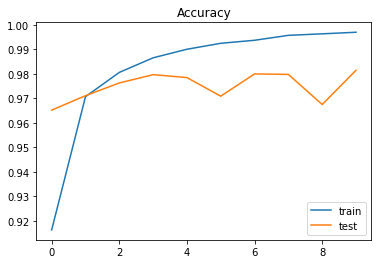

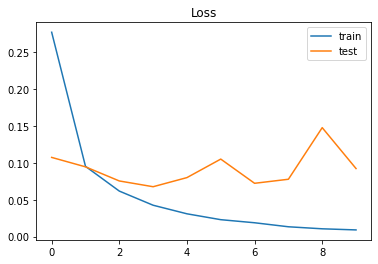

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=300):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

dense = dense_model()
dense.summary() 
dense.compile(loss="categorical_crossentropy", metrics=["accuracy"])

history = dense.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
plot_results(history)

**Question 5.** Rewrite the *dense_model* function to implement the same neural network as above, but using the functional API. 

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 500)               392500    
                                                                 
 dense_8 (Dense)             (None, 300)               150300    
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2776 - accuracy: 0.9146 - val_loss: 0.1684 - val_accuracy: 0.9469
Epoch 2/10
235/235 [==========

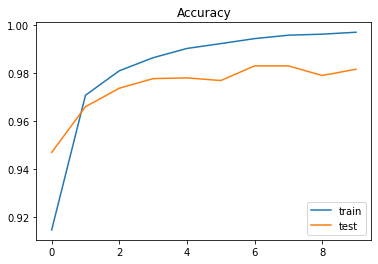

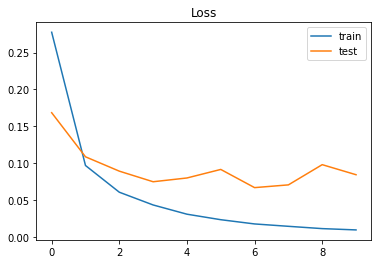

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=300):
  inputs = Input(shape = inputs)
  dense = Dense(hidden_1, activation='relu')(inputs)
  dense = Dense(hidden_2, activation='relu')(dense)
  ouputs = Dense(10, activation='softmax')(dense)
  model = Model(inputs, ouputs, name = 'classification_model')
  return model

dense = dense_model()
dense.summary() 
dense.compile(loss="categorical_crossentropy", metrics=["accuracy"])

history = dense.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
plot_results(history)